# Perform PCA of NACT samples ConsensusTME NES

Script related to figure 5d

Aim:
- See how ConsensusTME NES cluster across patients

## Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
home='~/Documents/PhD/Software/Scripts/OVCT/1.REBUTTAL/0.Figures/5' # home

## Get sample labels

### Load file

In [3]:
file_keys = home+'/1.Data/NACT_SampleLabels.txt'

sample_labels = pd.read_csv(file_keys,
                            sep='\t',
                            index_col='Well')

In [4]:
sample_labels.head()

,Name,Case_mRNA,NACT,Site,Bounds
Well,,,,,
A01,A01_3368A_Liver,3368,Untreated,other,in
A02,A02_3368B_Liver,3368,Treated,other,out
A03,A03_0371A_R_diaphragm,371,Untreated,other,out
A04,A04_0371B_R_diaphragm,371,Treated,other,out
A05,A05_9717A_R_ovary,9717,Untreated,ovary,in


### Define sample colours

In [5]:
case_mrna = list(set(sample_labels['Case_mRNA']))

colours = sns.color_palette("husl", len(case_mrna)).as_hex()

sample_labels['Colour'] = sample_labels['Case_mRNA'].replace(case_mrna, colours)

### Define sample markers

In [6]:
sites = ['ovary','omentum','other']
markers = ['o','^','s']

sample_labels['Site_marker'] = sample_labels['Site'].replace(sites,markers)

In [7]:
sample_labels.head()

,Name,Case_mRNA,NACT,Site,Bounds,Colour,Site_marker
Well,,,,,,,
A01,A01_3368A_Liver,3368,Untreated,other,in,#62ae31,s
A02,A02_3368B_Liver,3368,Treated,other,out,#62ae31,s
A03,A03_0371A_R_diaphragm,371,Untreated,other,out,#f45deb,s
A04,A04_0371B_R_diaphragm,371,Treated,other,out,#f45deb,s
A05,A05_9717A_R_ovary,9717,Untreated,ovary,in,#f564d1,o


## Load ssGSEA results

In [8]:
file_nes = home+'/1.Data/ConsensusTME_NACT_NES.txt'

data_nes = pd.read_csv(file_nes,
                       sep='\t')

data_nes.set_index('Term',
                   inplace=True)

In [9]:
data_nes.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,D12,E01,E02,E03,E04,E05,E06,E07,E08,E09
Term,,,,,,,,,,,,,,,,,,,,,
B_cells,0.254477,0.183183,0.328434,0.222920,0.158446,0.208608,0.153616,0.241499,0.227171,0.243108,...,0.282397,0.200239,0.268572,0.135625,0.237829,0.174235,0.346601,0.451349,0.345059,0.261922
Cytotoxic_cells,0.160124,0.086828,0.250783,0.469283,0.149997,0.280421,0.183015,0.136132,-0.013996,-0.005431,...,0.119812,0.128451,0.053743,-0.061381,0.264916,0.130406,0.056087,0.426493,0.242746,0.000835
Dendritic_cells,0.234120,0.242725,0.358290,0.249668,0.096655,0.219568,0.186520,0.244219,0.175394,0.125974,...,0.195455,0.213759,0.300447,0.175864,0.352042,0.078574,0.344772,0.479416,0.396381,0.237165
Endothelial,0.141871,-0.031062,0.359779,0.385954,-0.038934,0.295855,-0.023180,0.343295,0.143790,0.186743,...,0.214454,0.263538,0.230676,0.182908,0.467953,0.115959,0.192065,0.339805,0.233110,0.231086
Eosinophils,-0.104190,-0.001942,0.118276,0.292186,-0.136142,-0.127744,0.022336,0.303864,-0.069590,0.074915,...,-0.178187,-0.153298,0.104774,-0.223999,0.083588,-0.064987,0.086109,0.351228,0.080969,0.007399


### Check empty cells

In [10]:
set(data_nes.isnull().sum())

{0}

## Load mRNA tumour cellularity data

In [11]:
mRNA_tumcell_file = home+'/1.Data/NACT_log2exp_loess_norm_filtered_ESTIMATE.txt'

mRNA_tumcell = pd.read_csv(mRNA_tumcell_file,
                           skiprows=2,
                           sep='\t',
                           index_col='NAME')

del(mRNA_tumcell['Description'])

mRNA_tumcell.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,D12,E01,E02,E03,E04,E05,E06,E07,E08,E09
NAME,,,,,,,,,,,,,,,,,,,,,
StromalScore,150.243978,100.962227,967.051900,808.453034,-65.569315,489.893858,490.720381,1061.377025,235.450362,418.150347,...,263.744096,464.939728,802.734452,153.081049,1103.804616,579.702569,788.616732,1237.456125,887.344608,501.153545
ImmuneScore,176.145317,526.978700,1297.193578,1203.727348,131.468582,650.323221,407.055460,1082.029608,88.028614,282.209677,...,481.526245,516.592649,582.005013,29.396052,908.321033,258.334588,849.462145,1496.053219,969.848566,621.394231
ESTIMATEScore,326.389295,627.940928,2264.245478,2012.180381,65.899267,1140.217080,897.775841,2143.406633,323.478976,700.360025,...,745.270341,981.532377,1384.739465,182.477100,2012.125649,838.037157,1638.078877,2733.509343,1857.193174,1122.547776
TumorPurity,0.794327,0.766668,0.591924,0.621334,0.816969,0.716267,0.740642,0.606127,0.794586,0.759799,...,0.755497,0.732326,0.690764,0.806982,0.621341,0.746506,0.663403,0.535046,0.638998,0.718075


### Add mRNA tumour cellularity to NES dataframe

In [12]:
data_nes_t = data_nes.T

#### Multiply tumour cellularity times a small number to reduce it's impact in the PCA

In [13]:
data_nes_t['TumourCellularity_mRNA'] = mRNA_tumcell.loc['TumorPurity'] * 0.0001

In [14]:
data_nes = data_nes_t.T

In [15]:
data_nes.tail()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,D12,E01,E02,E03,E04,E05,E06,E07,E08,E09
Term,,,,,,,,,,,,,,,,,,,,,
T_cells_CD4,-0.151260,-0.172278,0.154900,0.069036,-0.212100,-0.143919,-0.146261,-0.001396,-0.258183,-0.120923,...,-0.199379,-0.213471,-0.171529,-0.244783,-0.033248,-0.194803,-0.077282,0.163015,-0.007922,-0.093441
T_cells_CD8,-0.124588,-0.099327,0.098996,0.082092,-0.169720,-0.144463,-0.167269,-0.004968,-0.159959,-0.155491,...,-0.087820,-0.106419,-0.118318,-0.247615,0.025758,-0.182130,-0.034114,0.168739,0.004279,-0.072557
T_cells_gamma_delta,-0.121056,-0.110020,0.020995,0.065898,-0.180424,-0.120656,-0.143999,-0.051105,-0.231617,-0.171884,...,-0.089236,-0.112779,-0.147467,-0.258662,-0.023540,-0.152077,-0.047563,0.172180,-0.019459,-0.113018
T_regulatory_cells,-0.171317,-0.176621,0.124944,0.077918,-0.287924,-0.195206,-0.345462,0.040120,-0.353342,-0.133729,...,-0.229964,-0.182788,-0.230199,-0.264175,-0.043436,-0.208631,-0.065168,0.105513,-0.091520,-0.187371
TumourCellularity_mRNA,0.000079,0.000077,0.000059,0.000062,0.000082,0.000072,0.000074,0.000061,0.000079,0.000076,...,0.000076,0.000073,0.000069,0.000081,0.000062,0.000075,0.000066,0.000054,0.000064,0.000072


### Visulase NES

#### Samples

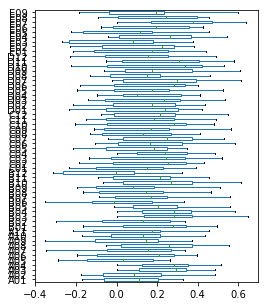

In [16]:
data_nes.plot(kind='box',
              vert=False,
              figsize=(4,5))

#### Variables

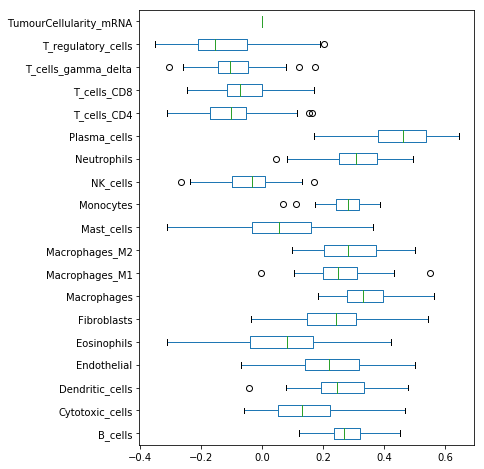

In [17]:
data_nes.transpose().plot(kind='box',
                          vert=False,
                          figsize=(6,8))

## Calculate and plot PCA

### Create custom colormaps (a.k.a. cmaps)

In [18]:
def make_cmap(colors, position=None, bit=False):
    
    '''
    make_cmap takes a list of tuples which contain RGB values. The RGB
    values may either be in 8-bit [0 to 255] (in which bit must be set to
    True when called) or arithmetic [0 to 1] (default). make_cmap returns
    a cmap with equally spaced colors.
    Arrange your tuples so that the first color is the lowest value for the
    colorbar and the last is the highest.
    position contains values from 0 to 1 to dictate the location of each color.
    '''
    import matplotlib as mpl
    import numpy as np
    bit_rgb = np.linspace(0,1,256)
    if position == None:
        position = np.linspace(0,1,len(colors))
    else:
        if len(position) != len(colors):
            sys.exit("position length must be the same as colors")
        elif position[0] != 0 or position[-1] != 1:
            sys.exit("position must start with 0 and end with 1")
    if bit:
        for i in range(len(colors)):
            colors[i] = (bit_rgb[colors[i][0]],
                         bit_rgb[colors[i][1]],
                         bit_rgb[colors[i][2]])
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):
        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))

    cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    
    return cmap

### Convert hex to rgb colour

In [19]:
def hex_to_rgb(value):
    
    '''Return (red, green, blue) for the color given as #rrggbb.'''
    
    value = value.lstrip('#')
    lv = len(value)
    
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

### Define cmaps for patient treatment kernel densities

In [20]:
NACT_colours = []
for sample in sample_labels.index:
    
    if sample_labels['NACT'][sample] == 'Untreated':
        NACT_colours.append('w')
    
    elif sample_labels['NACT'][sample] == 'Treated':
        NACT_colours.append(sample_labels['Colour'][sample])
    
    elif np.isnan(NACT_colours['NACT'][sample]):
        NACT_colours.append('w')
    
    else:
        raise ValueError()

In [21]:
NACT_colours_df = pd.DataFrame({'wells': sample_labels.index,
                                'NACT_colour':pd.Series(NACT_colours)})

NACT_colours_df.set_index('wells',
                          inplace=True)

sample_labels['NACT_colour'] = NACT_colours_df

In [22]:
white = (255,255,255)

reds = make_cmap([white, hex_to_rgb('#e41a1c')], bit=True)
blues = make_cmap([white, hex_to_rgb('#377eb8')], bit=True)
reds_r = make_cmap([hex_to_rgb('#e41a1c'), white], bit=True)
blues_r = make_cmap([hex_to_rgb('#377eb8'), white], bit=True)

### Colour-treatment correspondence

In [23]:
NACT_colour_d = {'Treated':reds,
                 'Untreated':blues}

NACT_colour_dr = {'Treated':reds_r,
                  'Untreated':blues_r}

In [24]:
sample_labels.head()

,Name,Case_mRNA,NACT,Site,Bounds,Colour,Site_marker,NACT_colour
Well,,,,,,,,
A01,A01_3368A_Liver,3368,Untreated,other,in,#62ae31,s,w
A02,A02_3368B_Liver,3368,Treated,other,out,#62ae31,s,#62ae31
A03,A03_0371A_R_diaphragm,371,Untreated,other,out,#f45deb,s,w
A04,A04_0371B_R_diaphragm,371,Treated,other,out,#f45deb,s,#f45deb
A05,A05_9717A_R_ovary,9717,Untreated,ovary,in,#f564d1,o,w


### Separate matched and unmatched samples

In [25]:
matched = [3368,371,9717,8674,2359,564,7765,6965,9347]

matched_df = sample_labels[sample_labels['Case_mRNA'].isin(matched)]

unmatched_df = sample_labels[~sample_labels['Case_mRNA'].isin(matched)]

In [26]:
matched_nes_df = data_nes[matched_df.index]

unmatched_nes_df = data_nes[unmatched_df.index]

## Calculate matched PCA

In [27]:
pca = PCA(n_components=7)

In [28]:
pca_nes = pca.fit_transform(matched_nes_df.transpose())

In [29]:
len(pca_nes) # check number of data points

18

#### Get PCA loadings

In [30]:
var_exp = pca.explained_variance_ratio_
var_exp

array([0.66381668, 0.10193908, 0.08387656, 0.03952195, 0.03438551,
       0.02178922, 0.01656684])

### Plot PCA

In [33]:
pcx=0
pcy=1

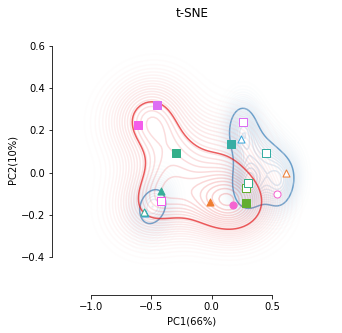

In [34]:
fig = plt.figure(figsize=(5, 5))

plt.title('t-SNE')

d_kde = {}
for i in range(len(pca_nes[:, 0])):
    
    plt.scatter(pca_nes[:, pcx][i],
                pca_nes[:, pcy][i],
                c=list(sample_labels['NACT_colour'])[i],
                edgecolors=list(sample_labels['Colour'])[i],
                marker=list(sample_labels['Site_marker'])[i],
                zorder=1,
                lw=1,
                s=50)
    
    if list(sample_labels['NACT'])[i] not in d_kde:
        
        d_kde[list(sample_labels['NACT'])[i]] = {'x':[pca_nes[:, pcx][i]],
                                                 'y':[pca_nes[:, pcy][i]]}
                                                 
    else:
        
        d_kde[list(sample_labels['NACT'])[i]]['x'].append(pca_nes[:, pcx][i])
        d_kde[list(sample_labels['NACT'])[i]]['y'].append(pca_nes[:, pcy][i])
        
for j in d_kde:

    sns.kdeplot(np.array(d_kde[j]['x']),
                np.array(d_kde[j]['y']),
                cmap=NACT_colour_d[j],
                n_levels=27,
                alpha=.2,
                zorder=0,
                cut=3)
    
    sns.kdeplot(np.array(d_kde[j]['x']),
                np.array(d_kde[j]['y']),
                cmap=NACT_colour_dr[j],
                n_levels=1,
                alpha=.7,
                zorder=0,
                cut=3)

xlabel = 'PC%i(%i%s)' % (pcx+1,var_exp[pcx]*100,'%')
ylabel = 'PC%i(%i%s)' % (pcy+1,var_exp[pcy]*100,'%')

plt.xlabel(xlabel)
plt.ylabel(ylabel)
sns.despine(trim=True)

### Save plot

In [35]:
file_name = '../2.Plots/5_d_NACT_matched_consensusTME_PCA_%s_%s.pdf' % (pcx,pcy)

fig.savefig(file_name,
            bbox='tight')

### Plot PCA loadings

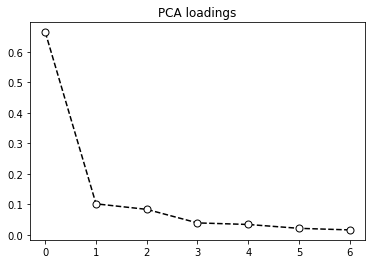

In [36]:
fig = plt.figure()

plt.title('PCA loadings')

plt.plot(var_exp, 'o', mfc='w', c='k', zorder=2, ms=7)
plt.plot(var_exp, '--', c='k', zorder=1)

### Save plot

In [37]:
file_name = '../2.Plots/s5_d_NACT_matched_consensusTME_PCA_loadings.pdf'

fig.savefig(file_name,
            bbox='tight')

## Calculate unmatched PCA

In [38]:
pca = PCA(n_components=7)

In [39]:
pca_nes = pca.fit_transform(unmatched_nes_df.transpose())

In [40]:
len(pca_nes) # check number of data points

38

#### Get PCA loadings

In [41]:
var_exp = pca.explained_variance_ratio_
var_exp

array([0.58139212, 0.10453163, 0.0762314 , 0.06810188, 0.04344725,
       0.03410704, 0.02790092])

### Plot PCA

In [44]:
pcx=0
pcy=1

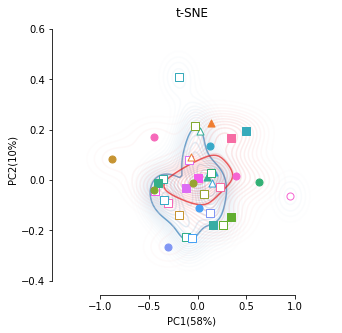

In [45]:
fig = plt.figure(figsize=(5, 5))

plt.title('t-SNE')

d_kde = {}
for i in range(len(pca_nes[:, 0])):
    
    plt.scatter(pca_nes[:, pcx][i],
                pca_nes[:, pcy][i],
                c=list(sample_labels['NACT_colour'])[i],
                edgecolors=list(sample_labels['Colour'])[i],
                marker=list(sample_labels['Site_marker'])[i],
                zorder=1,
                lw=1,
                s=50)
    
    if list(sample_labels['NACT'])[i] not in d_kde:
        
        d_kde[list(sample_labels['NACT'])[i]] = {'x':[pca_nes[:, pcx][i]],
                                                 'y':[pca_nes[:, pcy][i]]}
                                                 
    else:
        
        d_kde[list(sample_labels['NACT'])[i]]['x'].append(pca_nes[:, pcx][i])
        d_kde[list(sample_labels['NACT'])[i]]['y'].append(pca_nes[:, pcy][i])
        
for j in d_kde:

    sns.kdeplot(np.array(d_kde[j]['x']),
                np.array(d_kde[j]['y']),
                cmap=NACT_colour_d[j],
                n_levels=27,
                alpha=.2,
                zorder=0,
                cut=3)
    
    sns.kdeplot(np.array(d_kde[j]['x']),
                np.array(d_kde[j]['y']),
                cmap=NACT_colour_dr[j],
                n_levels=1,
                alpha=.7,
                zorder=0,
                cut=3)

xlabel = 'PC%i(%i%s)' % (pcx+1,var_exp[pcx]*100,'%')
ylabel = 'PC%i(%i%s)' % (pcy+1,var_exp[pcy]*100,'%')

plt.xlabel(xlabel)
plt.ylabel(ylabel)
sns.despine(trim=True)

### Save plot

In [46]:
file_name = '../2.Plots/5_d_NACT_unmatched_consensusTME_PCA_%s_%s.pdf' % (pcx,pcy)

fig.savefig(file_name,
            bbox='tight')

### Plot PCA loadings

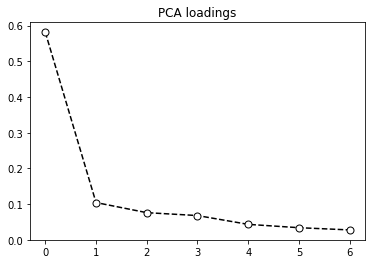

In [47]:
fig = plt.figure()

plt.title('PCA loadings')

plt.plot(var_exp, 'o', mfc='w', c='k', zorder=2, ms=7)
plt.plot(var_exp, '--', c='k', zorder=1)

### Save plot

In [48]:
file_name = '../2.Plots/s5_d_NACT_unmatched_consensusTME_PCA_loadings.pdf'

fig.savefig(file_name,
            bbox='tight')

# End script